In [12]:
# Install any missing packages
!pip install -q nltk scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Unzip the uploaded file
!unzip -o "archive (3).zip"


Archive:  archive (3).zip
  inflating: cleaned_texts.csv       
  inflating: filtered_data_extracts.csv  
  inflating: filtered_summarized_dataset.csv  


In [7]:
import pandas as pd

# Load the file
df = pd.read_csv("cleaned_texts.csv")

# Show the columns
df.columns


Index(['text', 'target'], dtype='object')

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("cleaned_texts.csv")

# Drop missing texts and limit to first 100 books for demo
df = df.dropna(subset=["text"])
df = df.head(100)

print("Books loaded:", len(df))
df.head(3)


Books loaded: 32


text               target
0  A Room With A View\nBy E M Forster\n Part One\...        E. M. Forster
1  The Enchanted April\nby Elizabeth Von Arnim\nC...  Elizabeth Von Arnim
2  A CHRISTMAS CAROL\nIN PROSE\nBEING\nA Ghost St...      Charles Dickens

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert book content to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])

print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (32, 5000)


In [10]:
from sklearn.cluster import KMeans

# Cluster books into 5 groups
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Show some results
df[['text', 'cluster']].head(10)



text  cluster
0  A Room With A View\nBy E M Forster\n Part One\...        1
1  The Enchanted April\nby Elizabeth Von Arnim\nC...        2
2  A CHRISTMAS CAROL\nIN PROSE\nBEING\nA Ghost St...        3
3  Ulysses\nby James Joyce\nContents\n — I —\n  1...        3
4  MOBYDICK\nor THE WHALE\nBy Herman Melville\nET...        3
5  The Brothers Karamazov\nTranslated from the Ru...        3
6  The Adventures of Sherlock Holmes\nby Arthur C...        3
7  Great Expectations\n1867 Edition\nby Charles D...        3
8  Twenty Years After\nBy Alexandre Dumas Père\nS...        3
9  A TALE OF TWO CITIES\nA STORY OF THE FRENCH RE...        3

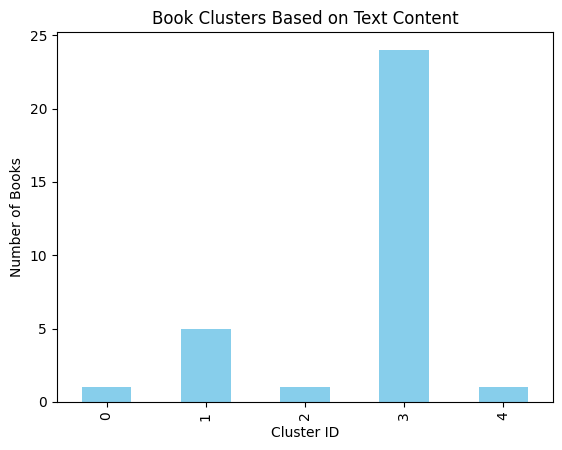

In [11]:
import matplotlib.pyplot as plt

# Plot how many books fall into each cluster
df['cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Book Clusters Based on Text Content")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Books")
plt.show()
